<a href="https://colab.research.google.com/github/gakurujnr/Sancom_Recommender_System/blob/main/Sancom_Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a movie recommender system using a Python library such as Surprise

or FastFM.

# Movie Recommender Sysytem


Recommender systems are useful for recommending users items based on their past preferences. Broadly, recommender systems can be split into content-based and collaborative-filtering types.

## Surprise

Surprise is a Python scikit specialized for recommender systems. 
It provides built-in public datasets, ready to deploy Collaborative Filtering algorithms, and evaluation metrics.

### Importing Libraries

In [5]:
## Installing Surprise

!pip install surprise

## Python Libraries

In [41]:
# Importing Numpy
import numpy as np    ## Python library used for working with arrays.

# Importing Pandas
import pandas as pd   ## Used for Data Analysis

# Importing Seaborn
import seaborn as sns  ## Python data visualization library based on matplotlib

# Importing Matplotlib
import matplotlib.pyplot as plt   ## It is a python Data Visualization Tool
%matplotlib inline

# Importing scipy from stats
from scipy import stats

### Importing Machine Learning Libraries

In [43]:
## Import Surprise
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
from surprise import KNNWithMeans
from surprise import accuracy

# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_ind

# Importing ttest_1samp from scipy.stats
from scipy.stats import ttest_1samp

from IPython.display import display

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Importing Data

We are loading the test and the train datasets

In [22]:
# Loading the Train Dataset from the source i.e. csv
## 
comedytrain = pd.read_csv("train.csv")
comedytrain.head()

,Viewers_ID,Joke_identifier,Response_ID,Rating
0,A1,Klint De Drunk Enugu 1,A1_Klint De Drunk Enugu 1,0.11
1,A1,Klint De Drunk Enugu 2,A1_Klint De Drunk Enugu 2,-4.64
2,A1,Klint De Drunk PH 1,A1_Klint De Drunk PH 1,-3.39
3,A1,Klint De Drunk PH 2,A1_Klint De Drunk PH 2,0.44
4,A1,Klint De Drunk Lagos 1,A1_Klint De Drunk Lagos 1,-4.83


In [23]:
## Checking the tail of the Train Dataset
comedytrain.tail()

,Viewers_ID,Joke_identifier,Response_ID,Rating
612697,A9999,Gordons Lagos 2,A9999_Gordons Lagos 2,-0.92
612698,A9999,Gordons Lagos 3,A9999_Gordons Lagos 3,2.44
612699,A9999,Gordons Lagos 4,A9999_Gordons Lagos 4,1.03
612700,A9999,Gordons Abuja 1,A9999_Gordons Abuja 1,1.22
612701,A9999,Gordons Abuja 4,A9999_Gordons Abuja 4,1.28


In [24]:
# Loading the Test Dataset from the source i.e. csv
## 
comedytest = pd.read_csv("test.csv")
comedytest.head()

,Viewers_ID,Joke_identifier,Response_ID
0,A1,Akpororo Lagos 1,A1_Akpororo Lagos 1
1,A1,Akpororo Abuja 1,A1_Akpororo Abuja 1
2,A1,Akpororo Abuja 5,A1_Akpororo Abuja 5
3,A1,I Go Dye Benin 1,A1_I Go Dye Benin 1
4,A1,I Go Dye Benin 3,A1_I Go Dye Benin 3


In [25]:
## Checking the tail of the Test Dataset
comedytest.tail()

,Viewers_ID,Joke_identifier,Response_ID
435868,A9999,Funny Bone Lagos 1,A9999_Funny Bone Lagos 1
435869,A9999,Okey Bakassi Lagos 2,A9999_Okey Bakassi Lagos 2
435870,A9999,Okey Bakassi Abuja 3,A9999_Okey Bakassi Abuja 3
435871,A9999,MisterIbu Lagos 1,A9999_MisterIbu Lagos 1
435872,A9999,MisterIbu Lagos 4,A9999_MisterIbu Lagos 4


In [26]:
## Checking the Train Dataset Columns
comedytrain.columns

Index(['Viewers_ID', 'Joke_identifier', 'Response_ID', 'Rating'], dtype='object')

We have four columns on the train Datasets Viewers_ID, Joke_identifier, Response_ID and Rating

In [27]:
## Checking the Test Dataset Columns
comedytest.columns

Index(['Viewers_ID', 'Joke_identifier', 'Response_ID'], dtype='object')

We have three columns on the Test Dataset Viewers_ID, Joke_identifier and Response_ID

Looking at what each column represents:

1. Viewers_ID: Unique ID of each respondent

2. Joke_identifier: Unique ID for each of the 127 comedy content (ties to specific comedian and event location)

3. Response_ID: Unique ID for unique combinations of Viewer_ID and ComedyEvent_identifier (as a single viewer may have rated different comedy jokes).

4. Rating: Rating given by the viewer to the specific comedy event

## Exploratory Data Analysis

The purpose of this EDA is to find insights which will serve us later on for Data cleaning which will ultimately be used into a machine learning algorithm and Modelling.

In [28]:
## Checking the Train Dataset Info
comedytrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612702 entries, 0 to 612701
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Viewers_ID       612702 non-null  object 
 1   Joke_identifier  612702 non-null  object 
 2   Response_ID      612702 non-null  object 
 3   Rating           612702 non-null  float64
dtypes: float64(1), object(3)
memory usage: 18.7+ MB


In [29]:
## Checking the Test Dataset Info
comedytest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435873 entries, 0 to 435872
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Viewers_ID       435873 non-null  object
 1   Joke_identifier  435873 non-null  object
 2   Response_ID      435873 non-null  object
dtypes: object(3)
memory usage: 10.0+ MB


In [30]:
# Checking whether each column has an appropriate datatype on both the train and test Dataset
#
print('Train: \n%s' % comedytrain.dtypes)
print('\nTest: \n%s' % comedytest.dtypes)

Train: 
Viewers_ID          object
Joke_identifier     object
Response_ID         object
Rating             float64
dtype: object

Test: 
Viewers_ID         object
Joke_identifier    object
Response_ID        object
dtype: object


The train Dataset has 3 objects and one float while test dataset has 3 objects

In [31]:
## Checking unique values on the joke identifier and viewers_id and train dataset
print('Number of unique values in Joke identifier: %d' % comedytrain.Joke_identifier.nunique())
print('Number of unique values in Viewers_ID: %d' % comedytrain.Viewers_ID.nunique())

Number of unique values in Joke identifier: 127
Number of unique values in Viewers_ID: 40863


## Data Cleaning

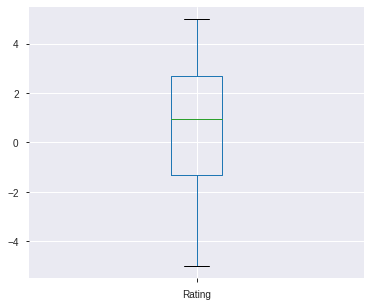

In [44]:
# Checking for Outliers
# Outliers in rating 

comedytrain['Rating'].plot.box(figsize=(6,5))
plt.show()

No outliers on the rating column according to boxplot

In [47]:
## Check for missing values on the Train Dataset per column

comedytrain.isnull().sum()

Viewers_ID         0
Joke_identifier    0
Response_ID        0
Rating             0
dtype: int64

In [46]:
## Check for missing values on the Test Dataset per column

comedytest.isnull().sum()

Viewers_ID         0
Joke_identifier    0
Response_ID        0
dtype: int64

There are no missing values on both the Train and Test Dataset

In [48]:
## Checking for unique values count per columns in the Datasets
print(comedytrain.nunique())
print('\n')
print(comedytest.nunique())

Viewers_ID          40863
Joke_identifier       127
Response_ID        612702
Rating                641
dtype: int64


Viewers_ID          40863
Joke_identifier       135
Response_ID        435873
dtype: int64


In [51]:
## Drop irrelevant column on train Dataset
comedytrain.drop("Response_ID", axis = 1, inplace=True)
comedytrain.head()

,Viewers_ID,Joke_identifier,Rating
0,A1,Klint De Drunk Enugu 1,0.11
1,A1,Klint De Drunk Enugu 2,-4.64
2,A1,Klint De Drunk PH 1,-3.39
3,A1,Klint De Drunk PH 2,0.44
4,A1,Klint De Drunk Lagos 1,-4.83


In [52]:
## Drop irrelevant column on test Dataset
comedytest.drop("Response_ID", axis = 1, inplace=True)
comedytest.head()

,Viewers_ID,Joke_identifier
0,A1,Akpororo Lagos 1
1,A1,Akpororo Abuja 1
2,A1,Akpororo Abuja 5
3,A1,I Go Dye Benin 1
4,A1,I Go Dye Benin 3


## Univariate Analysis

In [53]:
## Describe the Test Dataset
comedytest.describe()

,Viewers_ID,Joke_identifier
count,435873,435873
unique,40863,135
top,A366,Helen Paul Lagos 3
freq,37,16129


In [54]:
## Describe the Train Dataset
comedytrain.describe()

,Rating
count,612702.000000
mean,0.647024
std,2.667301
min,-5.000000
25%,-1.300000
50%,0.950000
75%,2.690000
max,5.000000


The average rating is 0.647024.

Minimum rating was -5.0.

Maximum rating was 5.0.

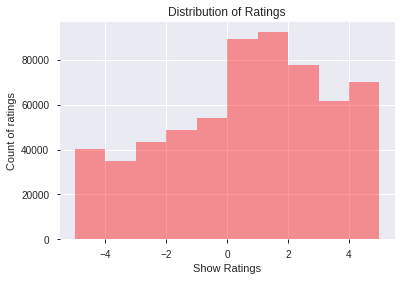

In [56]:
# Distribution of rating size
#
sns.distplot(comedytrain.Rating, bins = 10, kde=False, color = 'red')
plt.title('Distribution of Ratings')
plt.ylabel('Count of ratings')
plt.xlabel('Show Ratings')
plt.show()

The distribution is skewed to the left which states that the mean is to the left of the median

In [58]:
# Skew measurements for the training set.

comedytrain.Rating.skew()

# distribution of ratings of training is skewed to the left 

-0.3407666341369931

In [59]:
# kurtosis measurements for entire datafame

comedytrain.Rating.kurt()


-0.773735115840859

Value of kurtosis indicates dataframe is light-tailed(little to no outliers)

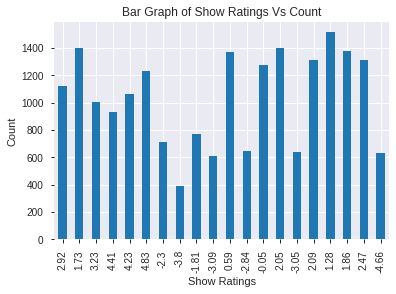

In [60]:
## Bar Graph of a Sample of the Ratings
comedytrain.Rating.value_counts().sample(20).plot.bar()
plt.xlabel('Show Ratings')
plt.ylabel('Count')
plt.title('Bar Graph of Show Ratings Vs Count')
plt.show()

On the 20 samples taken the least rating count is -3.8 and the highest count is 1.28

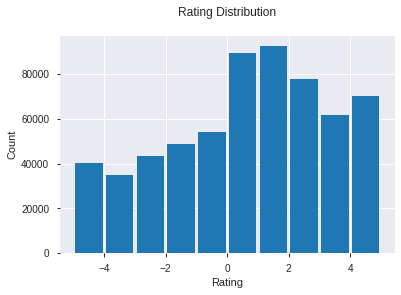

In [61]:
#finding the most given rating
Ratings=comedytrain['Rating']
plt.hist(Ratings,bins=10,histtype='bar',rwidth=0.9)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Most of the ratings are positive

In [64]:
#getting the shape of training and validation sets
print("The shape of the train Dataset is", comedytrain.shape)

print("The shape of the Test Dataset is", comedytest.shape)


The shape of the train Dataset is (612702, 3)
The shape of the Test Dataset is (435873, 2)


## Item-Based Recommendations

In [65]:
## Making a copy of the Train Dataset
cam = comedytrain.copy()
cam.head()

,Viewers_ID,Joke_identifier,Rating
0,A1,Klint De Drunk Enugu 1,0.11
1,A1,Klint De Drunk Enugu 2,-4.64
2,A1,Klint De Drunk PH 1,-3.39
3,A1,Klint De Drunk PH 2,0.44
4,A1,Klint De Drunk Lagos 1,-4.83


In [66]:
## Making a copy of the Test Dataset
testc = comedytest.copy()
testc.head()

,Viewers_ID,Joke_identifier
0,A1,Akpororo Lagos 1
1,A1,Akpororo Abuja 1
2,A1,Akpororo Abuja 5
3,A1,I Go Dye Benin 1
4,A1,I Go Dye Benin 3


In [69]:
## Groupby the Viewers_ID and Rating
## Taking value count which is less than 10 bbetween Rating and Viewers_ID
vcount = cam.groupby('Viewers_ID')['Rating'].count().reset_index().sort_values('Rating', ascending=False)
vc = vcount[~(vcount.Rating < 10)]
vc.head()

,Viewers_ID,Rating
29556,A366,54
14779,A233,54
29667,A367,54
8778,A179,54
26334,A337,54


In [70]:
## Groupby Joke_identifier to Rating
##
jc = cam.groupby('Joke_identifier')['Rating'].count().reset_index().sort_values('Rating', ascending=False)
jcount = jc[~(jc.Rating < 3000)]
jcount.head()

,Joke_identifier,Rating
100,Klint De Drunk PH 2,26311
94,Klint De Drunk Enugu 2,26286
99,Klint De Drunk PH 1,26254
95,Klint De Drunk Enugu 3,26234
96,Klint De Drunk Lagos 1,25864


In [72]:
## Converting the Joke_identifier to list
l1 = (jcount['Joke_identifier']).tolist()

l2 = (vc.Viewers_ID).tolist()
type(l1)

list

In [73]:
##
c = cam[(cam.Viewers_ID.isin(l2) & cam.Joke_identifier.isin(l1))]

## Sort Rating ina descending way
c.sort_values('Rating', ascending=False, inplace=True)

## Rating greater than 1
ccl = c[c.Rating > 1]
ccl.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Viewers_ID,Joke_identifier,Rating
396713,A33344,Klint De Drunk Lagos 1,5.0
6094,A10375,Bovi Lagos 4,5.0
569141,A7294,Akpororo Warri 2,5.0
206402,A22696,Klint De Drunk PH 1,5.0
581005,A8093,Klint De Drunk PH 1,5.0


In [74]:
# Creating a rating matrix/pivot table with viewers on rows and joke_identifier as columns

pivot_t = ccl.pivot_table(index=['Viewers_ID'],columns=['Joke_identifier'], values='Rating')
pivot_t.head(10)

Joke_identifier,AY Abuja 1,AY Lagos 1,AY Lagos 2,AY Lagos 3,AY Lagos 4,AY Warri 1,AY Warri 2,Akpororo Abuja 1,Akpororo Abuja 2,Akpororo Abuja 3,Akpororo Abuja 4,Akpororo Lagos 1,Akpororo Lagos 4,Akpororo Warri 1,Akpororo Warri 2,Akpororo Warri 3,Akpororo Warri 4,AliBaba Abuja 1,AliBaba Abuja 2,AliBaba Abuja 3,AliBaba Aso Rock 1,AliBaba Lagos 1,AliBaba Lagos 2,AliBaba Lagos 3,AliBaba Lagos 5,AliBaba PH 2,AliBaba PH 4,AliBaba PH 5,BasketMouth Abuja 1,BasketMouth Abuja 2,BasketMouth Abuja 3,BasketMouth Lagos 1,BasketMouth Lagos 2,BasketMouth Lagos 3,BasketMouth Lagos 4,BasketMouth Owerri 2,BasketMouth Uyo 1,Bovi Abuja 1,Bovi Abuja 2,Bovi Abuja 3,Bovi Abuja 4,Bovi Abuja 5,Bovi Lagos 1,Bovi Lagos 2,Bovi Lagos 4,Bovi Warri 1,Bovi Warri 2,Bovi Warri 3,I Go Dye Abuja 1,I Go Dye Abuja 2,I Go Dye Abuja 3,I Go Dye Abuja 4,I Go Dye Benin 1,I Go Dye Benin 2,I Go Dye Benin 3,I Go Dye Lagos 1,I Go Dye Lagos 2,I Go Dye Lagos 3,I Go Dye Lagos 4,I Go Dye Uyo 1,I Go Dye Uyo 2,Klint De Drunk Enugu 2,Klint De Drunk Enugu 3,Klint De Drunk Lagos 1,Klint De Drunk Lagos 2,Klint De Drunk Lagos 3,Klint De Drunk PH 1,Klint De Drunk PH 2,Klint De Drunk Warri 1,Seyi Law Ibadan 1,Seyi Law Ibadan 2,Seyi Law Ibadan 3,Seyi Law Lagos 1
Viewers_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1,NaN,NaN,NaN,NaN,NaN,4.39,4.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.34,NaN,NaN,NaN,4.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.39,NaN,NaN,NaN,4.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100,NaN,3.09,NaN,4.45,2.09,NaN,3.33,NaN,1.31,NaN,NaN,3.58,NaN,2.09,1.58,1.66,1.41,2.91,4.41,NaN,2.53,NaN,NaN,NaN,NaN,1.66,NaN,NaN,NaN,NaN,NaN,3.86,NaN,1.06,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94,2.45,NaN,NaN,NaN,NaN,NaN,NaN,1.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1000,1.47,NaN,1.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.52,NaN,NaN,NaN,NaN,NaN,2.89,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.22,NaN,NaN,NaN,NaN,1.44,NaN,NaN,NaN,NaN,NaN,1.81,NaN,NaN,NaN,NaN,NaN,2.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.47,NaN,NaN,NaN,NaN,NaN,2.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88,NaN,NaN,NaN,NaN,1.75,NaN,NaN,2.47,NaN,NaN,NaN,NaN
A10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,2.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1001,NaN,NaN,2.94,NaN,1.95,4.09,NaN,NaN,NaN,1.11,3.63,NaN,NaN,NaN,NaN,4.19,NaN,NaN,4.25,3.28,1.84,1.77,3.42,4.56,2.0,NaN,4.52,NaN,NaN,1.34,2.47,3.70,NaN,NaN,3.83,NaN,NaN,3.81,NaN,3.31,2.05,NaN,2.06,NaN,4.55,3.31,NaN,NaN,NaN,1.16,1.50,NaN,NaN,2.06,NaN,2.36,3.69,3.45,4.45,3.92,3.25,3.13,1.3,NaN,NaN,4.20,2.25,NaN,2.11,NaN,NaN,NaN,NaN
A10016,NaN,NaN,2.08,NaN,4.75,NaN,NaN,4.44,NaN,1.97,NaN,NaN,NaN,NaN,NaN,2.33,NaN,NaN,NaN,NaN,2.91,NaN,NaN,NaN,NaN,NaN,NaN,4.77,NaN,NaN,1.11,NaN,NaN,NaN,2.02,NaN,NaN,NaN,NaN,NaN,4.97,NaN,NaN,NaN,NaN,NaN,4.94,NaN,NaN,NaN,1.81,1.95,NaN,NaN,4.58,NaN,NaN,NaN,4.80,2.08,NaN,NaN,3.0,NaN,NaN,1.16,NaN,NaN,3.03,NaN,NaN,NaN,NaN
A10019,NaN,NaN,NaN,NaN,3.78,3.69,NaN,4.88,NaN,NaN,NaN,NaN,NaN,NaN,4.08,NaN,NaN,1.02,NaN,NaN,NaN,4.17,NaN,NaN,NaN,NaN,NaN,4.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.95,NaN,NaN,NaN,NaN,NaN,1.61,NaN,NaN,NaN,NaN,2.59,NaN,2.16,NaN,NaN,NaN,NaN,NaN,NaN,4.95,NaN,NaN,NaN,4.88,NaN,NaN,NaN,NaN
A10020,NaN,1.66,NaN,NaN,1.03,NaN,2.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Surprise 

## Collaborative Filtering using SVD(Singular Value Decomposition)

SVD is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.

Its main purpose is to reduce a dataset containing a large number of values to a dataset containing significantly fewer values, but still contains a large fraction of variability present in the original Data.

In [117]:
!pip install evaluate
import evaluate

In [101]:
## Imports
from surprise import KNNBasic, BaselineOnly
from surprise.model_selection import cross_validate

In [119]:
## Import Reader, Dataset, SVD, and Accuracy from  Surprise
from surprise import Reader, Dataset, SVD, accuracy
reader = Reader(rating_scale=(1,5))

In [102]:
## Define the BaselineOnly
## BaselineOnly - prediction algorithm provides a set of predictions that you can evaluate as you would any predictions for your problem 
## such as classification accuracy or RMSE.
clf = BaselineOnly()

In [135]:
##  Loading the dataset
data = Dataset.load_from_df(ccl, reader)
# data.split(n_folds=5)

In [111]:
##
algo = SVD()
trainset = data.build_full_trainset()
algo.fit(trainset)


# svd is used to obtain minimal RMSE

In [121]:
## Predicting RMSE and MAE
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9626  0.9630  0.9597  0.9614  0.9551  0.9604  0.0029  
MAE (testset)     0.7761  0.7762  0.7726  0.7748  0.7685  0.7737  0.0029  
Fit time          11.97   11.91   11.93   11.93   11.92   11.93   0.02    
Test time         0.36    0.40    0.37    0.36    0.36    0.37    0.01    


{'fit_time': (11.967619180679321,
  11.913646459579468,
  11.932990312576294,
  11.933223485946655,
  11.924042701721191),
 'test_mae': array([0.77614562, 0.77619825, 0.77263375, 0.77483731, 0.76848218]),
 'test_rmse': array([0.96257349, 0.96302539, 0.95972709, 0.96142139, 0.95513964]),
 'test_time': (0.35980701446533203,
  0.3983180522918701,
  0.37494897842407227,
  0.3629000186920166,
  0.3631412982940674)}

Root Mean Square Error is one of the metrics that can be used to gauge the accuracy of prediction

The lower the RMSE the more accurate the model.


The preferred RMSE values are normally below 1


Our average RMSE is 0.96, which is okay.

In [105]:
## Getting the Mean Absolute Error  3 cv
cross_validate(clf, data, measures=['MAE'], cv=3, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating MAE of algorithm BaselineOnly on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MAE (testset)     0.8677  0.8667  0.8659  0.8668  0.0007  
Fit time          0.88    0.96    1.00    0.94    0.05    
Test time         0.65    0.82    0.62    0.70    0.09    


{'fit_time': (0.8810110092163086, 0.9567489624023438, 0.9968123435974121),
 'test_mae': array([0.86773696, 0.86668474, 0.86592578]),
 'test_time': (0.6457796096801758, 0.8227880001068115, 0.6218159198760986)}

On average, the prediction shows a mean absolute error (MAE) of 0.867, this shows that the model is doing good prediction.

In [122]:
## Getting the Mean ABsolute Error for 5 cv
cross_validate(clf, data, measures=['MAE'], cv=5, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.8499  0.8522  0.8546  0.8517  0.8496  0.8516  0.0018  
Fit time          1.18    1.20    1.21    1.24    1.22    1.21    0.02    
Test time         0.24    0.25    0.25    0.26    0.26    0.25    0.01    


{'fit_time': (1.1802783012390137,
  1.200392723083496,
  1.2097017765045166,
  1.2363059520721436,
  1.2248871326446533),
 'test_mae': array([0.84991103, 0.85216494, 0.85464929, 0.85173604, 0.84960064]),
 'test_time': (0.24498677253723145,
  0.25175905227661133,
  0.25001049041748047,
  0.26079797744750977,
  0.2599349021911621)}

In [124]:
## Sample of the Model predictions of Rating being compared by the Actual ratings

print(algo.predict('A3500','Bovi Lagos 4',4.70))
print(algo.predict('A500', 'AY Lagos 4', 4.81))
print(algo.predict('A500', 'Akpororo Warri  2', 4.91))
print(algo.predict('A3010', 'AkpororoAbuja1'))


user: A3500      item: Bovi Lagos 4 r_ui = 4.70   est = 4.02   {'was_impossible': False}
user: A500       item: AY Lagos 4 r_ui = 4.81   est = 4.11   {'was_impossible': False}
user: A500       item: Akpororo Warri  2 r_ui = 4.91   est = 3.52   {'was_impossible': False}
user: A3010      item: AkpororoAbuja1 r_ui = None   est = 2.89   {'was_impossible': False}


The model is somewhat okay because there is no big difference between the Actual Rating and the Predicted Ratings

In [75]:
# Recommeding shows correlation-based similarity

show_watched = pivot_t['BasketMouth Lagos 4']
similarity = pivot_t.corrwith(show_watched)
similarity = similarity.sort_values(ascending=False)
similarity.head()

Joke_identifier
BasketMouth Lagos 4    1.000000
AliBaba Lagos 5        0.660175
BasketMouth Abuja 3    0.636770
Bovi Lagos 1           0.613731
AliBaba Abuja 3        0.609954
dtype: float64

For a viewer who has watched BasketMouth Lagos 4, the system would recommend Alibaba Lagos 5, BasketMouth Abuja 3, Bovi Lagos 1 and AliBaba Abuja 3 in that order.

This states that the Model is good for recommendation.

In [134]:
## Model accuracy using Rmse
train_pred = algo.test(trainset.build_testset())
# test_pred = algo.test(comedytest)

train_rmse = accuracy.rmse(train_pred, verbose=False)
train_rmse
print('Accuracy using rmse: {:.2f}%' .format(train_rmse * 100))


Accuracy using rmse: 71.47%


The Rmse seems to be okay that means that the model is good but with little hyper parameter tuning it can be fit to make good Ratings Predictions. As per now yes it can be used for recommendation of shows to viewers as the Ratings are well predicted.

## Conclusion

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations.

 It is more likely that BasketMouth Lagos 4 fans will like the commedy shows of the same production house or the same person e.g BasketMouth Abuja 3. 
 
Therefore, the recommender system is good and can be used for recommendation Based on the ratings and the joke_identifier maybe the inclusion of Tv show name while increase the accuracy of reccomendation.

Surprise is also good for Recommendation as it reccomends based on users past preferences. It keeps users history to help them in recommending their movie, books, or Tv Shows according to the way they like from their past preferences on their history.